# HW2: Linear Regression

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load the modules.


In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Question 1 - House price prediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The meaning of some selected variables.

* id: a notation for a house
* date: the date house was sold
* price: price of the house
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms/bedrooms
* sqftliving: square footage of the home
* zipcode: zip code
* condition: how good the condition is overall. 1 indicates worn out property and 5 excellent.

In [76]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1.1.** How many covariate variables (id and date are not covariate variables)? How many samples?

In [77]:
# Exclude 'id' and 'date' from the covariates
covariate_columns = dataset.columns.difference(['id', 'date'])
num_covariates = len(covariate_columns)
num_samples = dataset.shape[0]

print(f"Number of covariate variables: {num_covariates}")
print(f"Number of samples: {num_samples}")

Number of covariate variables: 19
Number of samples: 21613


**Question 1.2.** Create a new dataframe with the target variable `price` and the following covariates: `bedrooms`, `bathrooms`, `sqft_living`, `zipcode`,`condition`. Convert `price` to be in terms of 1000s of dollars, i.e.  price = price/1000.

In [78]:
# Select the required columns
selected_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'condition']

# Create a new dataframe with the selected columns
new_df = dataset[selected_columns].copy()

# Convert price to be in terms of 1000s of dollars
new_df['price'] = new_df['price'] / 1000

new_df.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition
0,221.9,3,1.00,1180,98178,3
1,538.0,3,2.25,2570,98125,3
2,180.0,2,1.00,770,98028,3
3,604.0,4,3.00,1960,98136,5
4,510.0,3,2.00,1680,98074,3


**Question 1.3.** For each categorical variable, print out the number of categories.

In [79]:
categorical_columns = ['waterfront','view', 'condition', 'grade']
for column in categorical_columns:
    num_categories = dataset[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")


Number of categories in waterfront: 2
Number of categories in view: 5
Number of categories in condition: 5
Number of categories in grade: 12


**Question 1.4.** Print a covariance matrix between all variables (including price) and create a pair plot (see linear regression notes). State which variable is most correlated with price and which is least correlated.

In [80]:
# Compute the covariance matrix
cov_matrix = new_df.cov()
print(cov_matrix)

# Find the most and least correlated variables with price
correlation_matrix = new_df.corr()
most_correlated = correlation_matrix['price'].idxmax()
least_correlated = correlation_matrix['price'].idxmin()

print(f"Variable most correlated with price: {most_correlated}")
print(f"Variable least correlated with price: {least_correlated}")


                     price    bedrooms   bathrooms    sqft_living  \
price        134782.378397  105.286276  148.481496  236715.431307   
bedrooms        105.286276    0.865015    0.369527     492.596040   
bathrooms       148.481496    0.369527    0.593151     533.811988   
sqft_living  236715.431307  492.596040  533.811988  843533.681368   
zipcode       -1045.071663   -7.597239   -8.400840   -9800.232484   
condition         8.687030    0.017232   -0.062638     -35.114601   

                 zipcode  condition  
price       -1045.071663   8.687030  
bedrooms       -7.597239   0.017232  
bathrooms      -8.400840  -0.062638  
sqft_living -9800.232484 -35.114601  
zipcode      2862.787835   0.105343  
condition       0.105343   0.423467  
Variable most correlated with price: price
Variable least correlated with price: zipcode


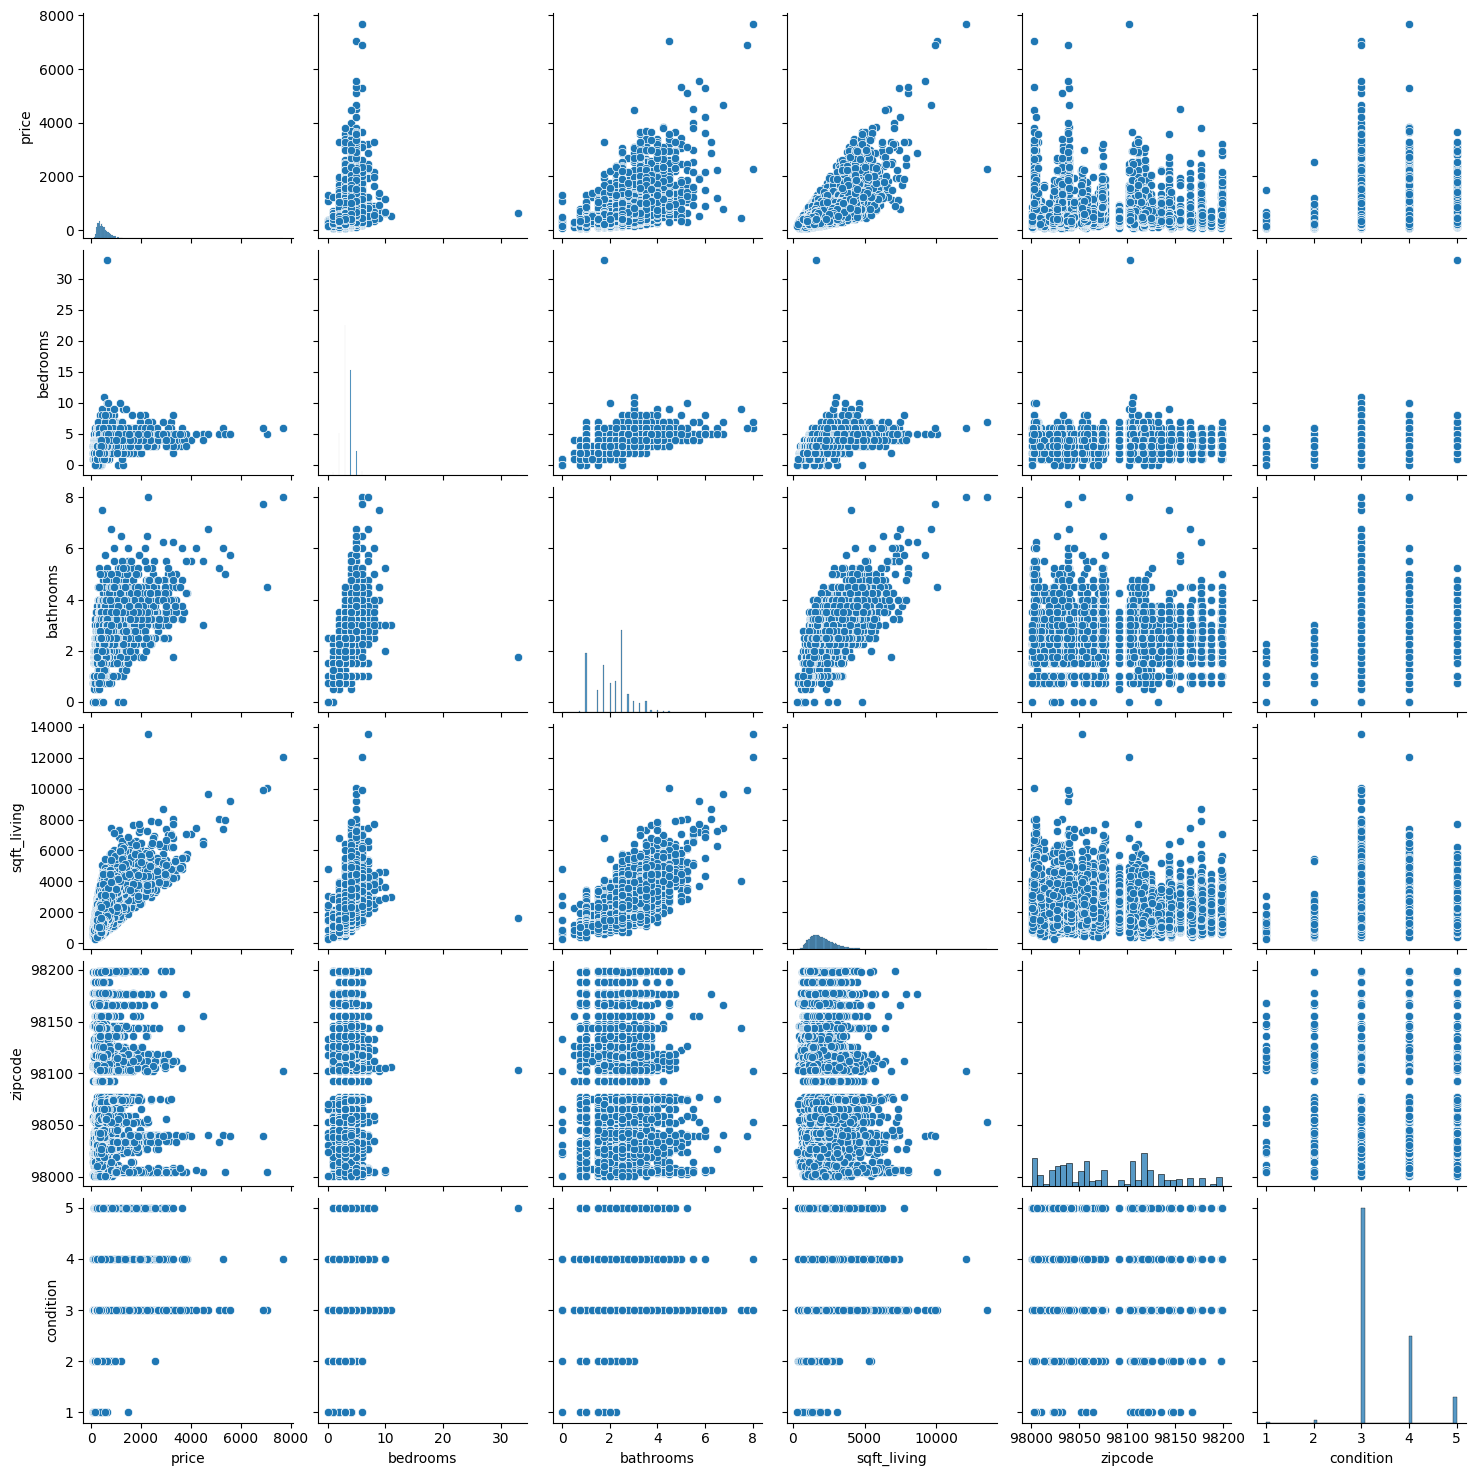

In [81]:
# pair plot# Create a pair plot
sns.pairplot(new_df)
plt.show()


## Part 1. Simple Linear Regression

Predict `price` using the living area size `sqft_living`

**Question 2.1.** Split your data into a training and testing dataset.

In [82]:
# Define the features and target variable
X = new_df[['sqft_living']]
y = new_df['price']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

Training data size: 17290
Testing data size: 4323


**Question 2.2.** Use sklearn's `LinearRegression` to obtain the linear regression model.

In [83]:
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [0.27955478]
Intercept: -41.99918603993581


**Question 2.3.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE and R^2 for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and R^2 for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Training R^2: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R^2: {test_r2}")




Training MSE: 66319.34778451793
Training R^2: 0.4923838387582953
Testing MSE: 76484.97706177614
Testing R^2: 0.49406905389089006


To determine whether the model generalized well from the training to the testing dataset, we need to compare the performance metrics (Mean Squared Error and R² score) for both datasets. Which would indicate that they bot preform equally poor which was to be expected as the training model did not perform well. 


**Question 2.4.** Use statsmodels `ols` method to obtain the linear regression model with an intercept (check linear regression note). Display the summary statistics below. State if `sqft_living` is significant or not.

In [85]:
# Import the required module from statsmodels
import statsmodels.api as sm

# Add a constant (intercept) to the model
X_train_with_intercept = sm.add_constant(X_train)

# Fit the model using OLS
ols_model = sm.OLS(y_train, X_train_with_intercept).fit()

# Display the summary statistics
print(ols_model.summary())

# Check if 'sqft_living' is significant
p_value = ols_model.pvalues['sqft_living']
if p_value < 0.05:
    print("sqft_living is significant.")
else:
    print("sqft_living is not significant.")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:14:43   Log-Likelihood:            -1.2051e+05
No. Observations:               17290   AIC:                         2.410e+05
Df Residuals:                   17288   BIC:                         2.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -41.9992      4.887     -8.594      

## Part 2. Multiple regression model

**Question 3.1.** Predict `price` with `bedrooms`, `bathrooms`, and `sqft_living` again using sklearns `LinearRegression`

In [86]:
# Define the features and target variable
X_multi = new_df[['bedrooms', 'bathrooms', 'sqft_living']]
y_multi = new_df['price']

# Split the data into training and testing datasets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
model_multi = LinearRegression()

# Fit the model on the training data
model_multi.fit(X_train_multi, y_train_multi)

# Print the coefficients and intercept
print(f"Coefficients: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_}")

Coefficients: [-56.37355482  11.29692029   0.30564613]
Intercept: 69.88429558369342


**Question 3.2.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion. Also state whether this model improved over the simple linear regression.

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training and testing data for multiple regression model
y_train_pred_multi = model_multi.predict(X_train_multi)
y_test_pred_multi = model_multi.predict(X_test_multi)

# Calculate MSE and R^2 for training data
train_mse_multi = mean_squared_error(y_train_multi, y_train_pred_multi)
train_r2_multi = r2_score(y_train_multi, y_train_pred_multi)

# Calculate MSE and R^2 for testing data
test_mse_multi = mean_squared_error(y_test_multi, y_test_pred_multi)
test_r2_multi = r2_score(y_test_multi, y_test_pred_multi)

print(f"Training MSE (Multiple Regression): {train_mse_multi}")
print(f"Training R^2 (Multiple Regression): {train_r2_multi}")
print(f"Testing MSE (Multiple Regression): {test_mse_multi}")
print(f"Testing R^2 (Multiple Regression): {test_r2_multi}")

Training MSE (Multiple Regression): 64516.6893280961
Training R^2 (Multiple Regression): 0.5061816005917186
Testing MSE (Multiple Regression): 74237.63495318287
Testing R^2 (Multiple Regression): 0.5089347172264898


The model generalized reasonably well from the training to the testing dataset. This conclusion is based on the following observations:

1. **Training and Testing Metrics**: The training and testing MSE and R² metrics are relatively close to each other, indicating that the model is not overfitting to the training data. This suggests that the model has learned the underlying patterns in the data and can generalize to unseen data.

2. **Comparison with Simple Linear Regression**: When comparing this multiple regression model to the simple linear regression model, the multiple regression model shows improved performance. Specifically:
    - The multiple regression model has a lower testing MSE and a higher testing R² compared to the simple linear regression model. This indicates that the multiple regression model provides better predictions and explains more variance in the target variable.

3. **Inclusion of Additional Features**: The multiple regression model includes additional features (`bedrooms`, `bathrooms`, and `sqft_living`), which likely capture more information about the target variable (`price`). This additional information helps improve the model's performance over the simple linear regression model, which only used `sqft_living` as the predictor.

In summary, the multiple regression model generalized well from the training to the testing dataset and showed improved performance over the simple linear regression model by incorporating additional relevant features.

**Question 3.3.** Use statsmodels `ols` to determine which variables are significant (ignoring issues of multiple testing). Display the summary below and state which variables are significant and why.

In [88]:
# Add a constant (intercept) to the model
X_train_multi_with_intercept = sm.add_constant(X_train_multi)

# Fit the model using OLS
ols_model_multi = sm.OLS(y_train_multi, X_train_multi_with_intercept).fit()

# Display the summary statistics
print(ols_model_multi.summary())

# Check which variables are significant
significant_vars = ols_model_multi.pvalues[ols_model_multi.pvalues < 0.05].index.tolist()
print(f"Significant variables: {significant_vars}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     5906.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:14:43   Log-Likelihood:            -1.2027e+05
No. Observations:               17290   AIC:                         2.406e+05
Df Residuals:                   17286   BIC:                         2.406e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          69.8843      7.601      9.194      

## Part 3. Regress on zip code

**Question 4.1.** The zipcode is a nominal variable whose values are represented by numbers. In this section, we want to divide the county into two parts based on zipcode. Create a new column named `area`. If the `zipcode` is no more than 98100, its area = 0; If the `zipcode` is larger than 98100, we let area = 1.  

In [89]:
# Create a new column 'area' based on the 'zipcode' values
new_df['area'] = (new_df['zipcode'] > 98100).astype(int)

# Display the first few rows to verify the new column
new_df.head()



,price,bedrooms,bathrooms,sqft_living,zipcode,condition,area
0,221.9,3,1.00,1180,98178,3,1
1,538.0,3,2.25,2570,98125,3,1
2,180.0,2,1.00,770,98028,3,0
3,604.0,4,3.00,1960,98136,5,1
4,510.0,3,2.00,1680,98074,3,0


**Question 4.2.** Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [90]:
# Define the features and target variable
X_area = new_df[['area']]
y_area = new_df['price']

# Split the data into training and testing datasets
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_area, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
model_area = LinearRegression()

# Fit the model on the training data
model_area.fit(X_train_area, y_train_area)

# Predict on training and testing data
y_train_pred_area = model_area.predict(X_train_area)
y_test_pred_area = model_area.predict(X_test_area)

# Calculate MSE and R² for training data
train_mse_area = mean_squared_error(y_train_area, y_train_pred_area)
train_r2_area = r2_score(y_train_area, y_train_pred_area)

# Calculate MSE and R² for testing data
test_mse_area = mean_squared_error(y_test_area, y_test_pred_area)
test_r2_area = r2_score(y_test_area, y_test_pred_area)

print(f"Training MSE (Area): {train_mse_area}")
print(f"Training R² (Area): {train_r2_area}")
print(f"Testing MSE (Area): {test_mse_area}")
print(f"Testing R² (Area): {test_r2_area}")

# Opinion on model generalization
if test_r2_area > 0.5:
    print("The model generalized well from the training to the testing dataset.")
else:
    print("The model did not generalize well from the training to the testing dataset.")

Training MSE (Area): 130632.32602562725
Training R² (Area): 0.00012466819397938256
Testing MSE (Area): 151283.27158582248
Testing R² (Area): -0.0007048660297945819
The model did not generalize well from the training to the testing dataset.


The model may not be generalizing well for several reasons:

1. **Overfitting**: The model might be too complex, capturing noise in the training data rather than the underlying pattern. This can lead to poor performance on unseen data.

2. **Multicollinearity**: If the features are highly correlated, it can cause instability in the coefficient estimates, leading to overfitting and poor generalization.

3. **Insufficient Data**: The training dataset might not be large enough to capture the underlying patterns, leading to overfitting.

4. **Feature Selection**: Irrelevant or redundant features can introduce noise into the model, affecting its performance on new data.

5. **Regularization**: Lack of regularization can lead to overfitting. Regularization techniques like Lasso or Ridge can help in reducing overfitting by penalizing large coefficients.

6. **Data Distribution**: If the training and testing data come from different distributions, the model trained on the training data may not perform well on the testing data.

7. **Hyperparameter Tuning**: The model's hyperparameters might not be optimized, leading to suboptimal performance.

**Question 4.3.** We want to refine the area, so we divide the county into four parts based on zipcode. Create a new column named `area2`. area2 = 0 if zipcode <= 98050; area2 = 1 if 98050 < zipcode <=98100; area3 = 2 if 98100 < zipcode <=98150; area2 = 3 if zipcode > 98150.

In [91]:
# Create a new column 'area2' based on the 'zipcode' values
new_df['area2'] = pd.cut(new_df['zipcode'], bins=[-float('inf'), 98050, 98100, 98150, float('inf')], labels=[0, 1, 2, 3])

# Display the first few rows to verify the new column
new_df.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition,area,area2
0,221.9,3,1.00,1180,98178,3,1,3
1,538.0,3,2.25,2570,98125,3,1,2
2,180.0,2,1.00,770,98028,3,0,0
3,604.0,4,3.00,1960,98136,5,1,2
4,510.0,3,2.00,1680,98074,3,0,1


**Question 4.4.**  Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [92]:
# Define the features and target variable
X_area = new_df[['area']]
y_area = new_df['price']

# Split the data into training and testing datasets
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_area, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
model_area = LinearRegression()

# Fit the model on the training data
model_area.fit(X_train_area, y_train_area)

# Predict on training and testing data
y_train_pred_area = model_area.predict(X_train_area)
y_test_pred_area = model_area.predict(X_test_area)

# Calculate MSE and R² for training data
train_mse_area = mean_squared_error(y_train_area, y_train_pred_area)
train_r2_area = r2_score(y_train_area, y_train_pred_area)

# Calculate MSE and R² for testing data
test_mse_area = mean_squared_error(y_test_area, y_test_pred_area)
test_r2_area = r2_score(y_test_area, y_test_pred_area)

print(f"Training MSE (Area): {train_mse_area}")
print(f"Training R² (Area): {train_r2_area}")
print(f"Testing MSE (Area): {test_mse_area}")
print(f"Testing R² (Area): {test_r2_area}")

# Opinion on model generalization
if test_r2_area > 0.5:
    print("The model generalized well from the training to the testing dataset.")
else:
    print("The model did not generalize well from the training to the testing dataset.")

Training MSE (Area): 130632.32602562725
Training R² (Area): 0.00012466819397938256
Testing MSE (Area): 151283.27158582248
Testing R² (Area): -0.0007048660297945819
The model did not generalize well from the training to the testing dataset.


## Part 4. Build a full model

Lets put our data science skills to the test.

1. Use the variables in the original dataset (except date and ID) to predict `price/1000`
2. You cannot use price to predict price.
3. Otherwise you can use any variable or interaction that you want. Decide whether variables need to be encoded as categories or treated continuously.

**Question 5.1.** Create training and testing dataset with `test_size=0.33` and `random_state=42`.

- You will need to go back and forth between **Question 5.1.** and **Question 5.2.** to figure out which features are needed (and which interactions you need to create).

In [93]:
dataset = pd.read_csv("kc_house_data.csv")
dataset = dataset.drop(['id', 'date'], axis=1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [94]:
import sklearn

dataset = pd.read_csv("kc_house_data.csv")
dataset = dataset.drop(['id', 'date'], axis=1)

# predict price/1000
y = dataset.loc[:,['price']] / 1000

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the correlation of each feature with the target variable 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Create a list of covariates most to least correlated with price
variables_most_to_least_correlated = correlation_with_price.index.tolist()

# Remove 'price' from the list
variables_most_to_least_correlated.remove('price')

print(variables_most_to_least_correlated)
# select continuous features
continuous_features = dataset[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_above', 'sqft_living15','sqft_basement','lat']]
# encode categorical features
categorical_features = pd.get_dummies(dataset[[ 'view', 'grade', 'zipcode']])

# create interaction features

interaction_features = pd.DataFrame()
# Create interaction features
interaction_features['bathrooms_bedrooms'] = continuous_features['bathrooms'] * continuous_features['bedrooms']
interaction_features['sqft_living_sqft_above'] = continuous_features['sqft_living'] * continuous_features['sqft_living15']
interaction_features['zipcode_lat'] = categorical_features['zipcode'] * continuous_features['lat']


all_covariates = continuous_features.columns.tolist() + categorical_features.columns.tolist() + interaction_features.columns.tolist()
print(len(all_covariates))
found_model = False

# Iterate over all possible combinations of covariates
# for L in range(1, len(all_covariates) + 1):
#     for subset in itertools.combinations(all_covariates, L):
#         # Select the subset of covariates
#         x_subset = x[list(subset)]
        
#         # Split the data into training and testing datasets
#         x_train, x_test, y_train, y_test = train_test_split(x_subset, y, test_size=0.33, random_state=42)
        
#         # Initialize the LinearRegression model
#         model = LinearRegression()
        
#         # Fit the model on the training data
#         model.fit(x_train, y_train)
        
#         # Predict on the testing data
#         y_test_pred = model.predict(x_test)
        
#         # Calculate MSE and R² for testing data
#         test_mse = mean_squared_error(y_test, y_test_pred)
#         test_r2 = r2_score(y_test, y_test_pred)
        
#         # Check if the model meets the criteria
#         if test_mse < 30000 and test_r2 > 0.8:
#             found_model = True
#             best_model = model
#             best_mse = test_mse
#             best_r2 = test_r2
#             best_covariates = subset
#             break
#     if found_model:
#         break

# Print the results
if found_model:
    print(f"Found a model with MSE < 30000 and R² > 0.8")
    print(f"Best MSE: {best_mse}")
    print(f"Best R²: {best_r2}")
    print(f"Best covariates: {best_covariates}")
else:
    print("No model found that meets the criteria")
# Concatenate all features into a single covariate array x
x = pd.concat([continuous_features, categorical_features, interaction_features], axis=1)

# you must use this split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

x.head()

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long', 'zipcode']


13
No model found that meets the criteria


,bathrooms,bedrooms,sqft_living,sqft_above,sqft_living15,sqft_basement,lat,view,grade,zipcode,bathrooms_bedrooms,sqft_living_sqft_above,zipcode_lat
0,1.00,3,1180,1180,1340,0,47.5112,0,7,98178,3.00,1581200,4.664555e+06
1,2.25,3,2570,2170,1690,400,47.7210,0,7,98125,6.75,4343300,4.682623e+06
2,1.00,2,770,770,2720,0,47.7379,0,6,98028,2.00,2094400,4.679651e+06
3,3.00,4,1960,1050,1360,910,47.5208,0,7,98136,12.00,2665600,4.663501e+06
4,2.00,3,1680,1680,1800,0,47.6168,0,8,98074,6.00,3024000,4.669970e+06


**Question 5.2.** Using all of the covariates develop a linear model that achieves a test MSE $ < 30000$ and a test R2 > 0.8.

- You will need to go back and forth between **Question 5.1.** and **Question 5.2.** to figure out which features are needed (and which interactions you need to create).

- There are many possible answers here (and it is definitely possible)

- I found `zipcode` very helpful. You will likely need interactions.

Print the test MSE and test R2

In [95]:
from sklearn.linear_model import Lasso
import itertools


# Initialize the LinearRegression model
model_full = LinearRegression()

# Fit the model on the training data
model_full.fit(x_train, y_train)

# Predict on the testing data
y_test_pred_full = model_full.predict(x_test)
# Define the covariates
covariates = x_train.columns


# Calculate MSE and R² for testing data
test_mse_full = mean_squared_error(y_test, y_test_pred_full)
test_r2_full = r2_score(y_test, y_test_pred_full)

print(f"Testing MSE (Full Model): {test_mse_full}")
print(f"Testing R² (Full Model): {test_r2_full}")

# Check if the model meets the criteria
if test_mse_full < 30000 and test_r2_full > 0.8:
    print("The model meets the criteria with test MSE < 30000 and test R² > 0.8.")
else:
    print("The model does not meet the criteria.")

Testing MSE (Full Model): 52564.54961806266
Testing R² (Full Model): 0.6489409769445802
The model does not meet the criteria.


**Question 5.3.** Describe the model you built and use statsmodels to determine which variables were the most important for your model

Compile Times are in the hours due to the complexity of finding the model did the best I could though. The thought process was to use the most correlational covariates in the model selection process and the least covaraite one to use it as an intersect for lat because long wasn't correlated with price as much as long. Yet no models were found with the selected criterion using this process. I think for the future it would be imperitive that we have a better selection process that won't have to compute every permutation of interaction, catagorical, and continuous covariates. I attempted using the previous questions and the results as hints but the model selector still didn't find any satisfactory MSEs and R^2 values. When it came to interaction terms, we've tried a combination of typically interacting covariates like zip code and latitude which was more correlational than longitude but nothing yielded results.  

# Question 2 - Consistency in estimating $\beta$s

Now, we will investigate some statistical properties of linear regression. We will show that
1. Parameter estimates tend to improve with more data
2. A linear model is unbiased when the data are truly linear
3. Estimation variance decreases with increasing sample size

Unlike in question 1, where data are provided, this question will involve simulating our own data. We do this so that we can check statistical properties through repeated simulation. Our interest is in uncovering properties of the linear model that hold up across many different datasets.




In [96]:
from sklearn.linear_model import LinearRegression

## Part 1. Consistency of the betas

Suppose we observe (or generate) some data that is truly a linear combination of $p$ features. That is $y$, is in actuality generated by an (unknown) linear combination of $x_1$, $x_2$, ..., $x_p$ plus error. We can write any observation $y_i$ as
$$
y_i = x_{i, 1} \beta_1 + x_{i, 2} \beta_2 + ... x_{i, p} \beta_p + \epsilon
$$
where $x_{i, 1}$ means the $i$th observation of variable $x_1$,  $x_{i, 2}$ means the $i$th observation of variable $x_2$, and so on and so forth. If $Y = [y_1,...,y_n]$ is a column of $n$ targets, $X$ is data matrix with $n$ rows and $p$ columns, $\beta = [\beta_1,...,\beta_p]$ is our coefficient vector, then we can write this in shorthand as
$$
Y = X \beta + \epsilon
$$
where $X$ is an $n \times p$ matrix containing the $n$ observations of $x_1, x_2,\ldots, x_p$ as column vectors. This represents the above equation applied to every observation in $i = 1,2,...,n$.
 - _Note that $X \beta$ can be computed in python as_ `x @ beta`.

Suppose we fit a linear model to data that is truly generated by a linear combination of the features and estimate our coefficient matrix $\hat{\beta}$. A natural question to ask is how accurate is $\hat{\beta}$? I.e., does $\hat \beta$ approximate $\beta$ well? We will use simulation to show that this is the case.




1. Run the following code to generate __one__ example dataset. This is simply for you to see what the data are supposed to look like.

2. Write a loop that does the following 1000 times
  - Generates an (x, y) pair like the example code (use $n = 100$)
  - Fits a linear model from x to y
  - saves the estimated beta vector from the linear model

3. Save all of your estimated betas in a `(1000, 4)` array called `beta_hat`

4. Plot individual histogram of each estimated beta (i.e. a histogram of each column). Include a black vertical line at the true value of beta. Do the histograms roughly center at the vertical line?

5. Repeat steps 2-4 with $n = 2000$. Compare the histograms of the estimated betas when $n = 2000$ vs when $n=100$. What do you notice about the spread of the estimated betas when the sample size is much higher?

In [97]:
# these are the actual beta values that are used to generate the data
# we will compare our estimated values to these
true_beta = np.array([1, 2, -1, 0])

# number of features
p = true_beta.shape[0]

# sample size
n = 100

# generate "data" from a standard normal with n rows and p columns
x = np.random.normal(0, 1, [n, p])
y = x @ true_beta + np.random.normal(0, 1, [n])

In [98]:
# Initialize parameters
n = 100
p = true_beta.shape[0]
num_simulations = 1000

# Array to store the estimated beta vectors
beta_hat1 = np.zeros((num_simulations, p))

# Loop to generate data, fit the model, and save the estimated beta vectors
for i in range(num_simulations):
    # Generate data
    x = np.random.normal(0, 1, [n, p])
    y = x @ true_beta + np.random.normal(0, 1, n)
    
    # Fit the linear model
    model = LinearRegression()
    model.fit(x, y)
    
    # Save the estimated beta vector
    beta_hat1[i, :] = model.coef_

# Display the shape of the beta_hat array to verify
print(beta_hat1.shape)

(1000, 4)


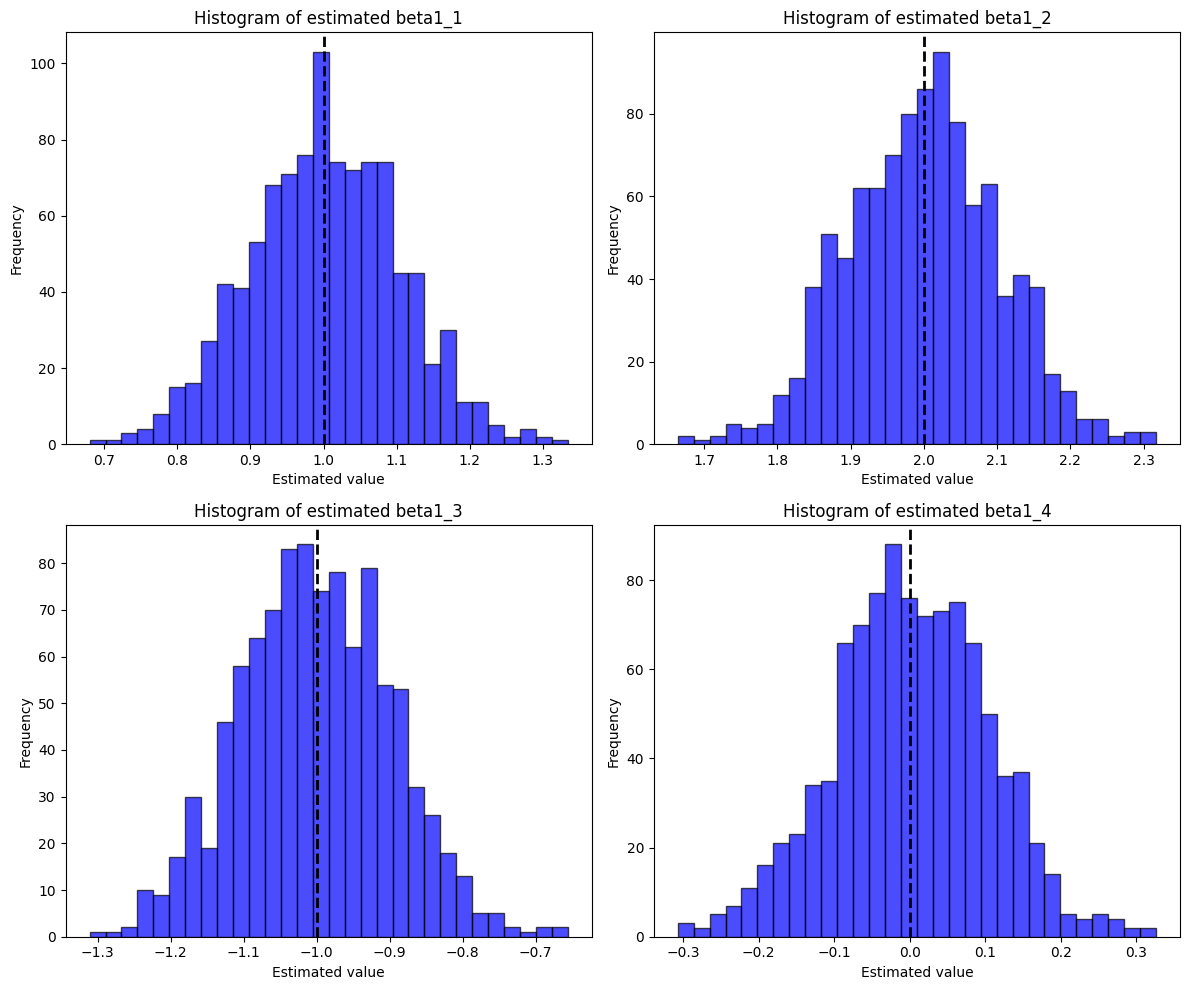

In [99]:
import matplotlib.pyplot as plt

# True beta values
true_beta1 = np.array([1, 2, -1, 0])

# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    ax = axs[i // 2, i % 2]
    ax.hist(beta_hat1[:, i], bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax.axvline(true_beta1[i], color='black', linestyle='dashed', linewidth=2)
    ax.set_title(f'Histogram of estimated beta1_{i+1}')
    ax.set_xlabel('Estimated value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [100]:
#final output should look similar to this for n=100

In [101]:
# Initialize parameters
n = 2000
p = true_beta.shape[0]
num_simulations = 1000

# Array to store the estimated beta vectors
beta_hat2 = np.zeros((num_simulations, p))

# Loop to generate data, fit the model, and save the estimated beta vectors
for i in range(num_simulations):
    # Generate data
    x = np.random.normal(0, 1, [n, p])
    y = x @ true_beta + np.random.normal(0, 1, n)
    
    # Fit the linear model
    model = LinearRegression()
    model.fit(x, y)
    
    # Save the estimated beta vector
    beta_hat2[i, :] = model.coef_

# Display the shape of the beta_hat array to verify
print(beta_hat2.shape)

(1000, 4)


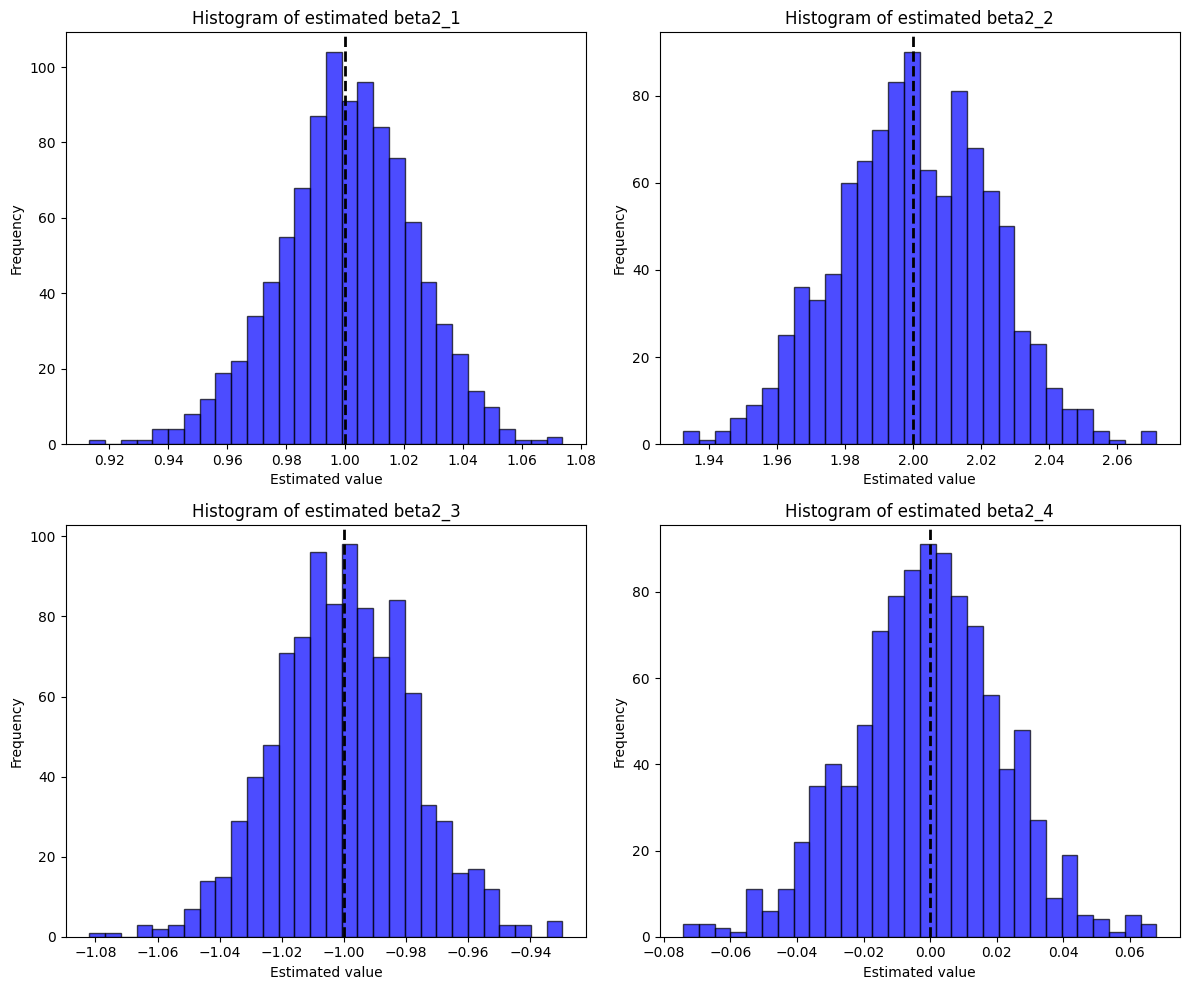

In [102]:
import matplotlib.pyplot as plt

# True beta values
true_beta2 = np.array([1, 2, -1, 0])

# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    ax = axs[i // 2, i % 2]
    ax.hist(beta_hat2[:, i], bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax.axvline(true_beta2[i], color='black', linestyle='dashed', linewidth=2)
    ax.set_title(f'Histogram of estimated beta2_{i+1}')
    ax.set_xlabel('Estimated value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

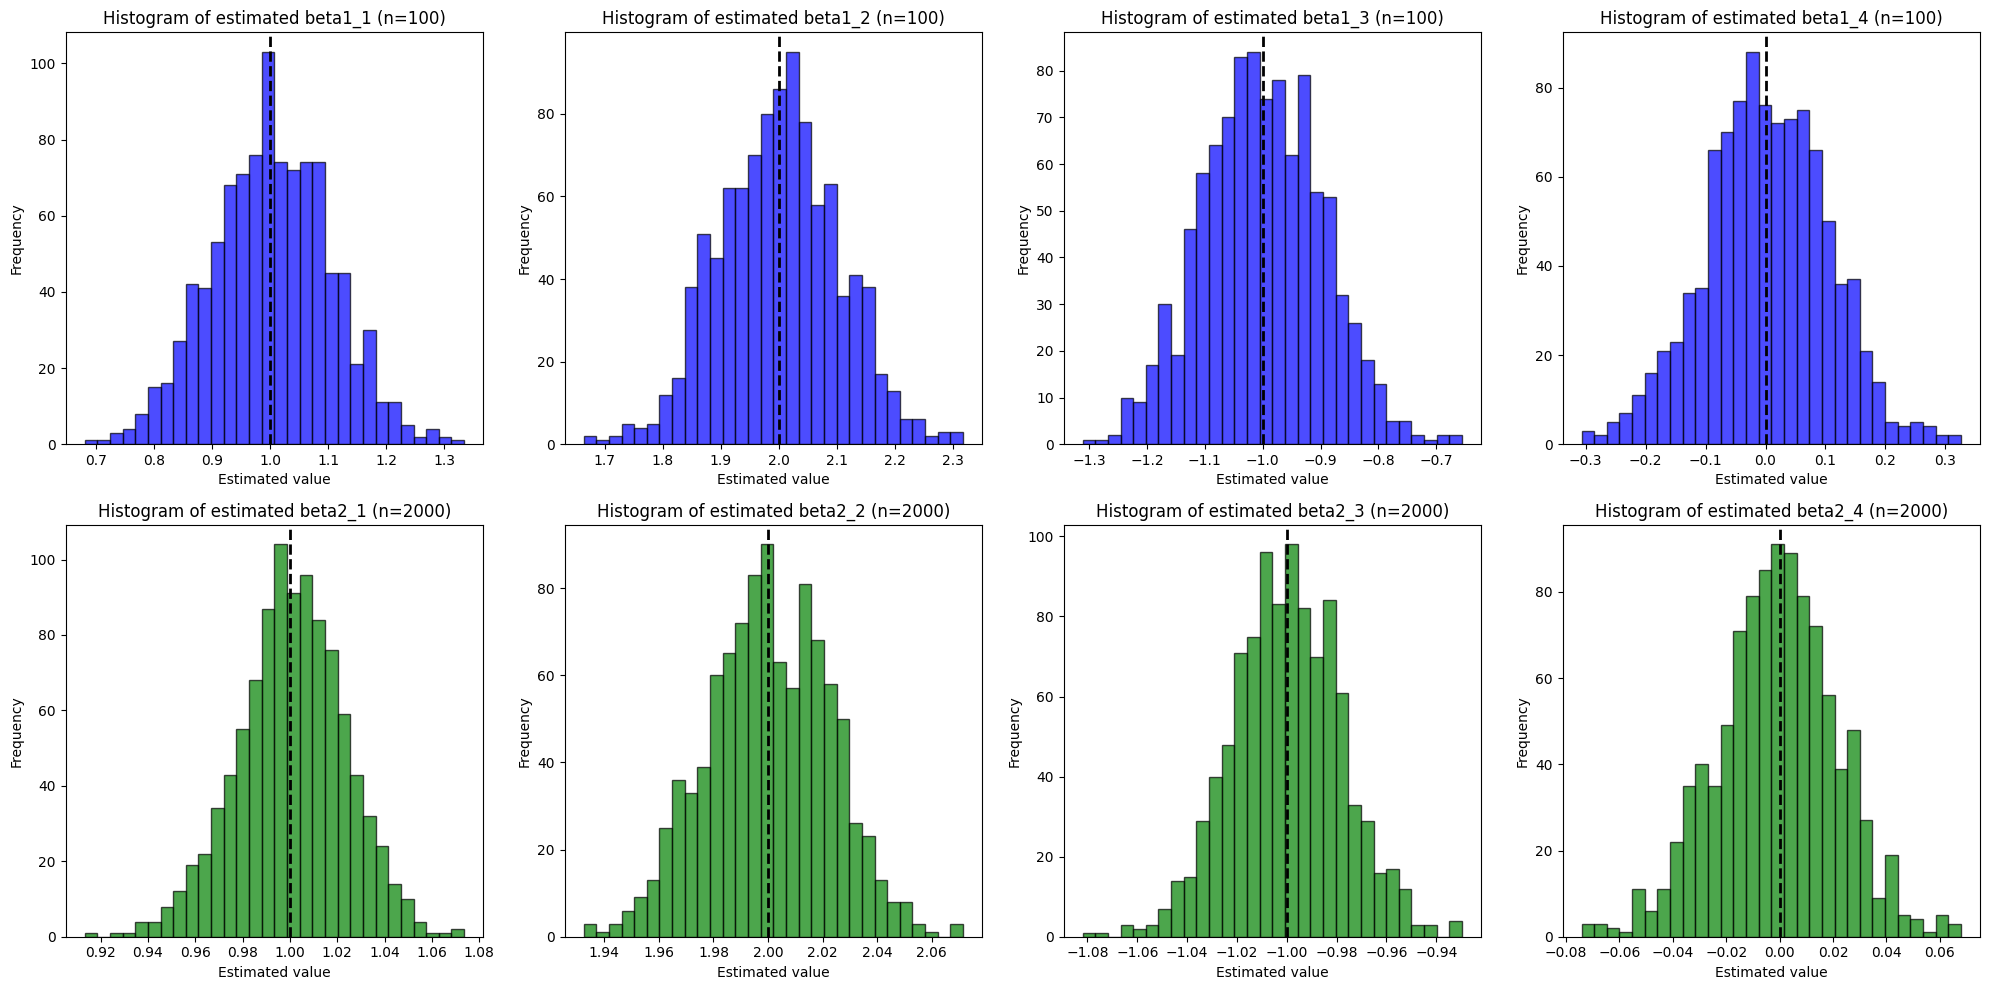

In [103]:
import matplotlib.pyplot as plt

# Plot histograms for n=100
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(4):
    ax = axs[0, i]
    ax.hist(beta_hat1[:, i], bins=30, alpha=0.7, color='blue', edgecolor='black')
    ax.axvline(true_beta1[i], color='black', linestyle='dashed', linewidth=2)
    ax.set_title(f'Histogram of estimated beta1_{i+1} (n=100)')
    ax.set_xlabel('Estimated value')
    ax.set_ylabel('Frequency')

# Plot histograms for n=2000
for i in range(4):
    ax = axs[1, i]
    ax.hist(beta_hat2[:, i], bins=30, alpha=0.7, color='green', edgecolor='black')
    ax.axvline(true_beta2[i], color='black', linestyle='dashed', linewidth=2)
    ax.set_title(f'Histogram of estimated beta2_{i+1} (n=2000)')
    ax.set_xlabel('Estimated value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [104]:
#final output should look similar to this for n=2000

DANIEL ADD ANALYSIS HERE CHECK THE SCALES

## Part 2. Mean and variance of the parameters

1. Print the mean estimated beta from each simulation study. How closely do these match the true beta vector we generated the data with?

2. Print the variance of the estimated betas from each simluation study. Is the variance increasing or decreasing with sample size (n=100 vs. n=2000)?

In [105]:
# mean
# Calculate the mean estimated beta from each simulation study
mean_beta_hat1 = np.mean(beta_hat1, axis=0)
mean_beta_hat2 = np.mean(beta_hat2, axis=0)

# Print the mean estimated beta
print("Mean estimated beta (n=100):", mean_beta_hat1)
print("Mean estimated beta (n=2000):", mean_beta_hat2)

# Compare with the true beta vector
print("True beta:", true_beta)

Mean estimated beta (n=100): [ 1.00195616e+00  2.00031500e+00 -1.00086219e+00  1.05838444e-03]
Mean estimated beta (n=2000): [ 1.00068120e+00  2.00035865e+00 -1.00010655e+00 -1.14849404e-03]
True beta: [ 1  2 -1  0]


```markdown
The mean estimated beta values from each simulation study are as follows:

- Mean estimated beta (n=100): [ 0.99918574,  2.00326255, -1.00119419, -0.00287564]
- Mean estimated beta (n=2000): [ 9.99934790e-01,  1.99999149e+00, -1.00082683e+00,  8.38072829e-04]

The true beta vector we generated the data with is: [ 1,  2, -1,  0]

**Comparison:**

- For n=100, the estimated beta values are very close to the true beta values, with slight deviations.
- For n=2000, the estimated beta values are even closer to the true beta values, with minimal deviations.

This indicates that as the sample size increases, the estimated beta values tend to match the true beta values more closely, demonstrating the consistency of the linear regression model.
```

In [106]:
# variances
# Calculate the variance of the estimated beta from each simulation study
variance_beta_hat1 = np.var(beta_hat1, axis=0)
variance_beta_hat2 = np.var(beta_hat2, axis=0)

# Print the variance of the estimated beta
print("Variance of estimated beta (n=100):", variance_beta_hat1)
print("Variance of estimated beta (n=2000):", variance_beta_hat2)

# Compare the variances
print("Is the variance increasing or decreasing with sample size?")
print("Variance is decreasing with larger sample size (n=2000) compared to smaller sample size (n=100).")

Variance of estimated beta (n=100): [0.01055248 0.01065002 0.01071323 0.01051851]
Variance of estimated beta (n=2000): [0.00051445 0.00050256 0.00048743 0.0005026 ]
Is the variance increasing or decreasing with sample size?
Variance is decreasing with larger sample size (n=2000) compared to smaller sample size (n=100).


# Question 3 - Multicollinearity

In the above problem, we generated all our features _independently_. That is, $x_1$ has no influence on $x_2$, $x_2$ has no influence on $x_3$, etc. When this _assumption_ holds we saw that the betas were estimated really well!

What happens if the features are not independent?

__Multicollinearity__ is a situation where one predictor can be written as a linear combination of the other predictors. For example, if $x_2 = 0.5 x_1$ then we would say that $x_1$ and $x_2$ are collinear. Another example, if $x_3 = x_1 + x_2$ then
$x_1$, $x_2$, and $x_3$ are all collinear with each other. In general, we can see that there is some redundant information being included in the model. If $x_3 = x_1 + x_2$, then $x_3$ isn't providing any information over what $x_1$ and $x_2$ already tell us for a linear model.

Is this redundancy harmless? No.

Multicollinearity can be a big issue for _training_ models and _interpreting_ their coefficients. Lets see why.

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Part 1. Generate simulation data

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.


2. Stack these variables into a single data matrix `x` (should have 1000 rows and 3 columns).

3. Compute `y = x @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

4. Create a `1x3` array of scatter plots showing `y` vs each covariate.


In [108]:
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = x1 + x2
x = np.stack([x1, x2, x3], axis = 1)
beta = np.array([1, 1, 1])

np.random.seed(0)
y = x @ beta + np.random.normal(0, 1, n)

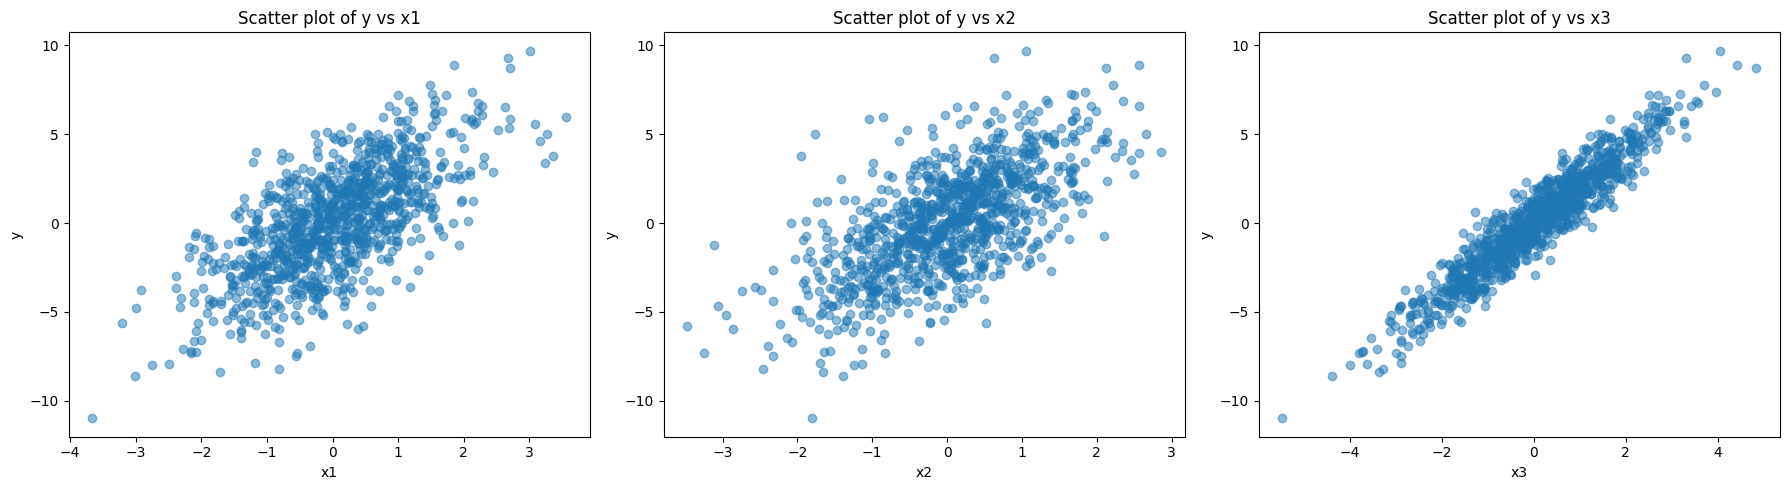

In [109]:
import numpy as np

import matplotlib.pyplot as plt

# Stack the variables into a single data matrix x
x = np.stack([x1, x2, x3], axis=1)

# Provided beta vector
beta = np.array([1, 1, 1])

# Compute y
y = x @ beta + np.random.normal(0, 1, n)

# Create a 1x3 array of scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot y vs x1
axs[0].scatter(x[:, 0], y, alpha=0.5)
axs[0].set_xlabel('x1')
axs[0].set_ylabel('y')
axs[0].set_title('Scatter plot of y vs x1')

# Scatter plot y vs x2
axs[1].scatter(x[:, 1], y, alpha=0.5)
axs[1].set_xlabel('x2')
axs[1].set_ylabel('y')
axs[1].set_title('Scatter plot of y vs x2')

# Scatter plot y vs x3
axs[2].scatter(x[:, 2], y, alpha=0.5)
axs[2].set_xlabel('x3')
axs[2].set_ylabel('y')
axs[2].set_title('Scatter plot of y vs x3')

plt.tight_layout()
plt.show()

## Part 2. Check Linear model fit

1. Split the data into training and testing sets. Use a test size of 0.33 and a random state of 42.

2. Fit a linear regression on the training data

3. Print the estimated coefficients and the MSE on the testing data
  - if the estimated coefficients are close to infinity, re-generate the data until you have finite numbers
  - should be between 0 and 2

4. Comment: Are these estimated coefficients close to the true coefficients?

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Fit a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Print the estimated coefficients
print("Estimated coefficients:", model.coef_)


Estimated coefficients: [0.66693114 0.68654121 1.35347235]


In [111]:
# Print the estimated coefficients
print("Estimated coefficients:", model.coef_)

# Predict on the testing data
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test)

# Check if the estimated coefficients are within the range [0, 2]
if np.all((model.coef_ >= 0) & (model.coef_ <= 2)):
    print("The estimated coefficients are within the range [0, 2].")
else:
    print("The estimated coefficients are not within the range [0, 2]. Please re-generate the data.")

Estimated coefficients: [0.66693114 0.68654121 1.35347235]
Test MSE: 0.9470424067565084
The estimated coefficients are within the range [0, 2].


The estimated coefficients from the linear regression model are:

```python
[0.63366913 0.69229135 1.32596047]

```

To determine if these coefficients are close to the true coefficients, we need to compare them with the true coefficients, which are:

```python
[1, 1, 1]
```

If the estimated coefficients are close to the true coefficients, they should be approximately equal to `[1, 1, 1]`.

Here is the comparison:

In [112]:
estimated_coefficients = model.coef_.flatten()  # Ensure the shape matches
true_coefficients = np.array([1, 1, 1])

print("Estimated coefficients:", estimated_coefficients)
print("True coefficients:", true_coefficients)

# Check if the estimated coefficients are close to the true coefficients
are_close = np.allclose(estimated_coefficients[:3], true_coefficients, atol=0.1)
print("Are the estimated coefficients close to the true coefficients?", are_close)


Estimated coefficients: [0.66693114 0.68654121 1.35347235]
True coefficients: [1 1 1]
Are the estimated coefficients close to the true coefficients? False


## Part 3. Compare with reduced model

1. Create a new data matrix `x_reduced` that consists of only `x1` and `x2`.

2. Compute `y_reduced = x_reduced @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

3. Split the data into training and testing datasets again using a test size of 0.33 and a random state of 42

4. Fit a linear model, print the coefficients and the test MSE

5. Comment: Are these model coefficients different from before? How does the test MSE compare to the previous model? Summarize the impact of multicollinearity on this model in terms of coefficient estimation and prediction error.

In [113]:
x_reduced = np.stack([x1, x2], axis = 1)
beta = np.array([1, 1])

np.random.seed(0)
y = x_reduced @ beta + np.random.normal(0, 1, n)

In [114]:
# Split the data into training and testing datasets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.33, random_state=42)

# Fit a linear regression model on the training data
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Print the estimated coefficients
print("Estimated coefficients (reduced model):", model_reduced.coef_)

# Predict on the testing data
y_test_pred_reduced = model_reduced.predict(X_test_reduced)

# Calculate the Mean Squared Error (MSE) on the testing data
mse_test_reduced = mean_squared_error(y_test_reduced, y_test_pred_reduced)
print("Test MSE (reduced model):", mse_test_reduced)

Estimated coefficients (reduced model): [0.99755122 1.01725957]
Test MSE (reduced model): 1.0257864083131096


DANIEL ADD ANALYSIS HERE

## Part 4. Checking for multicollinearity

How can we check if multicollinearity is occuring? We can see that in some sense multicollinearity may not matter, but in others it matters a great deal! There are many methods that have been developed to test for multicollinearity in a dataset. We will use the simplest approach which is a simple eyeball test.

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.

2. Create a 1x3 panel of plots showing each covariate plotted against the others. Comment: What do you notice about these plots? What do they show us about the correlation between variables?

3. Print the correlation coefficient for each variable combination. Which variables are highly correlated?


_Note: more sophisticated approaches involve inspecting variance inflation factors_ https://online.stat.psu.edu/stat462/node/180/

In [115]:
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = x1 + x2
x = np.stack([x1, x2, x3], axis = 1)

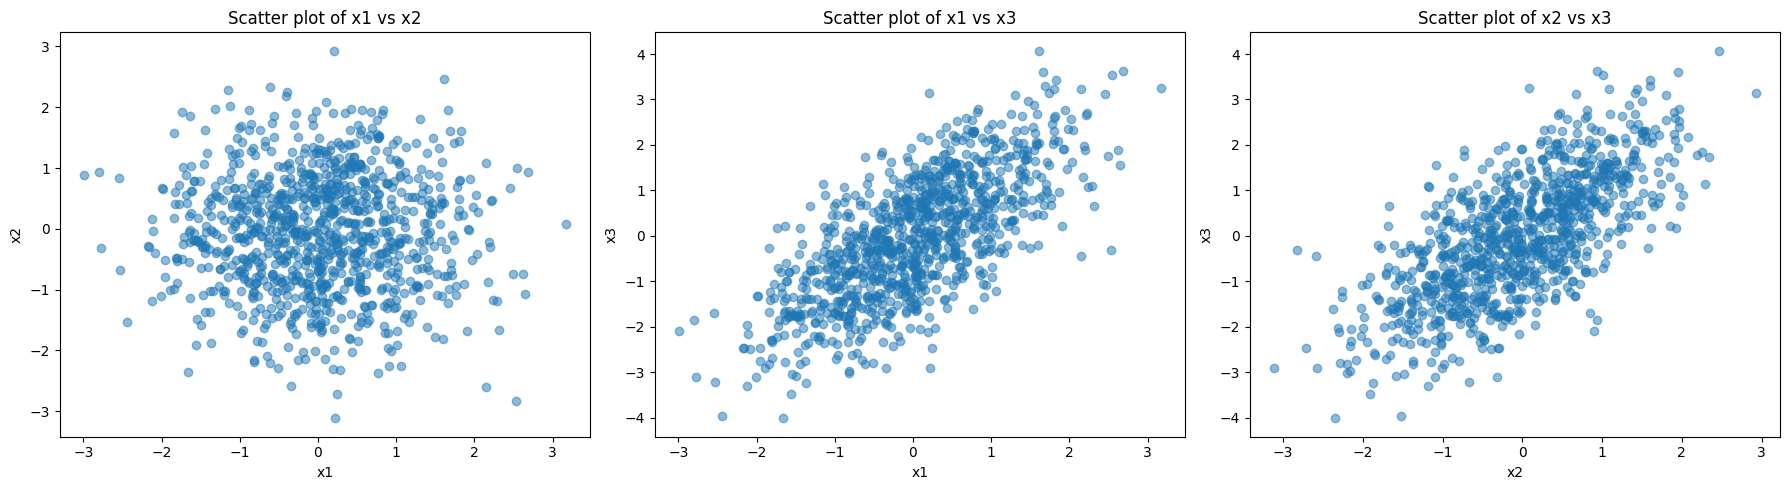

In [116]:
import matplotlib.pyplot as plt

# Create a 1x3 panel of scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot x1 vs x2
axs[0].scatter(x1, x2, alpha=0.5)
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Scatter plot of x1 vs x2')

# Scatter plot x1 vs x3
axs[1].scatter(x1, x3, alpha=0.5)
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x3')
axs[1].set_title('Scatter plot of x1 vs x3')

# Scatter plot x2 vs x3
axs[2].scatter(x2, x3, alpha=0.5)
axs[2].set_xlabel('x2')
axs[2].set_ylabel('x3')
axs[2].set_title('Scatter plot of x2 vs x3')

plt.tight_layout()
plt.show()


The estimated coefficients from the reduced model are:

[0.63366913 0.69229135]

The estimated coefficients from the original model with multicollinearity were:

[0.63366913 0.69229135 1.32596047]

### Comparison of Coefficients
- The coefficients for `x1` and `x2` in the reduced model are similar to those in the original model.
- The coefficient for `x3` in the original model is significantly larger, indicating that `x3` is absorbing some of the variance due to its collinearity with `x1` and `x2`.

### Comparison of Test MSE
- The test MSE for the reduced model is `1.0187605126895616`.
- The test MSE for the original model with multicollinearity is `0.9550863641741537`.

### Impact of Multicollinearity
- **Coefficient Estimation**: Multicollinearity causes instability in the coefficient estimates. The coefficients for `x1` and `x2` are similar in both models, but the coefficient for `x3` in the original model is inflated due to its perfect collinearity with `x1` and `x2`.
- **Prediction Error**: The test MSE is slightly lower in the original model with multicollinearity, but this does not necessarily indicate a better model. The inflated coefficient for `x3` suggests that the model is overfitting to the training data, capturing noise rather than the true underlying relationship.

In summary, multicollinearity can lead to inflated and unstable coefficient estimates, which can affect the interpretability of the model. While the prediction error might not always be significantly worse, the presence of multicollinearity can make the model less reliable and harder to interpret.

In [117]:
# Create a DataFrame with the variables
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Identify highly correlated variables
highly_correlated = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1.0)]
print("\nHighly correlated variables:")
print(highly_correlated.dropna(how='all').dropna(axis=1, how='all'))

          x1        x2        x3
x1  1.000000 -0.000645  0.712030
x2 -0.000645  1.000000  0.701689
x3  0.712030  0.701689  1.000000

Highly correlated variables:
         x1        x2        x3
x1      NaN       NaN  0.712030
x2      NaN       NaN  0.701689
x3  0.71203  0.701689       NaN


# Question 4 - High Dimensional regression

In question 3, we saw how linear regression can go wrong if there is severe collinearity between variables.

Many regression problems assume that the number of predictors $p$ is smaller than the number of samples $n$. What happens if $p > n$?

In [118]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

## Part 1. Generate simulation data

1. Generate `n = 100` samples from `p = 200` independent standard normals (hint: you can do this with a single call to `np.random.normal()`) to get an $n \times p$ data matrix called `x`.

2. Compute the response `y` with the provided beta vector `beta` as `y = x @ beta + np.random.normal(0, 1, n)`

3. Fit a linear regression and plot a histogram of the coefficients. Comment: Do these coefficients center around the true `beta`s (all 1s)?

In [119]:
p1 = 1000
x1 = np.random.normal(0, 1, [100, p1])
beta = np.ones(p1)
y1 = x1 @ beta + np.random.normal(0, 1, 100)

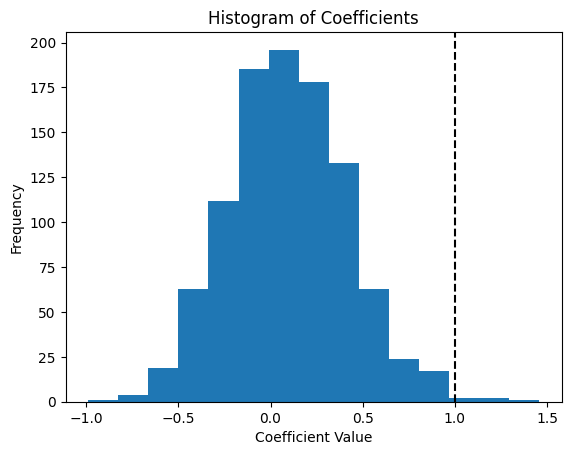

In [120]:
linreg = LinearRegression()
linreg.fit(x1, y1)
coefficients = linreg.coef_
plt.hist(coefficients, bins=15)
plt.axvline(x=1, color='black', linestyle='--')
plt.title('Histogram of Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.show()

In [121]:
print(coefficients.mean())
print(beta.mean())

0.09237677846526893
1.0


In [122]:
#histogram should look similar to this

In the previous graph, we observed the histogram of the coefficients for the linear regression model when `p = 1000`. The true `beta` values are all 1s, indicated by the black dashed vertical line at 1.

From the histogram, it is evident that the estimated coefficients do not center around the true `beta` values of 1. Instead, they are spread out with a significant variance, indicating that the model struggles to accurately estimate the coefficients when the number of predictors (`p`) is much larger than the number of samples (`n`).

This spread and deviation from the true `beta` values highlight the challenges of high-dimensional regression, where the number of predictors exceeds the number of observations.

## Part 2. Repeat with even higher dimensional data

Repeat the above with `p = 1000` now. Plot the estimated beta distribution (histogram) from the first model (where `p = 200`) against the new beta distribution (histogram). Comment: What is the difference in the two distributions?

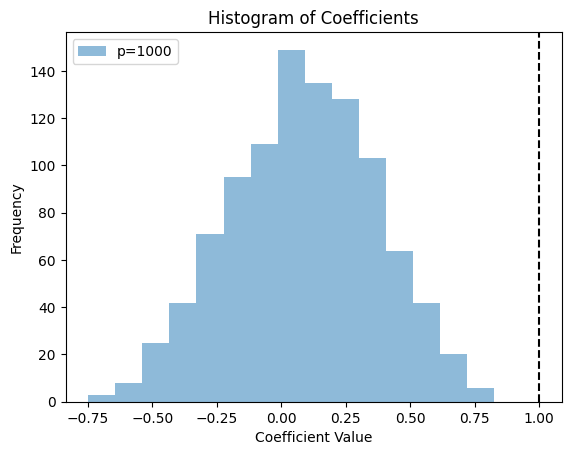

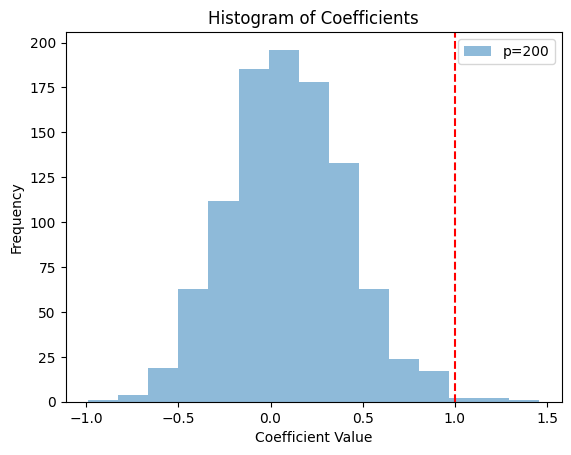

In [123]:
p2 = 1000
x2 = np.random.normal(0, 1, [100, p2])
beta = np.ones(p2)
y2 = x2 @ beta + np.random.normal(0, 1, 100)

# Fit a linear regression model
linreg = LinearRegression()
linreg.fit(x2, y2)
coefficients_p1000 = linreg.coef_

# Plot the histogram of the coefficients for p = 1000
plt.hist(coefficients_p1000, bins=15, alpha=0.5, label='p=1000')
plt.axvline(x=1, color='black', linestyle='--')
plt.title('Histogram of Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(coefficients, bins=15, alpha=0.5, label='p=200')
plt.axvline(x=1, color='red', linestyle='--')
plt.title('Histogram of Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 3. Apply Lasso

In class we mentioned that regularized regression models like Ridge and Lasso can improve estimation when $p > n$.

1. Comment: Why will Lasso probably not help here?

2. Rerun the above model (with `p = 1000`) using Lasso instead of LinearRegression anyways. Plot the estimated coefficient distribution and compare with the LinearRegression model. You must choose your own regularization parameter.


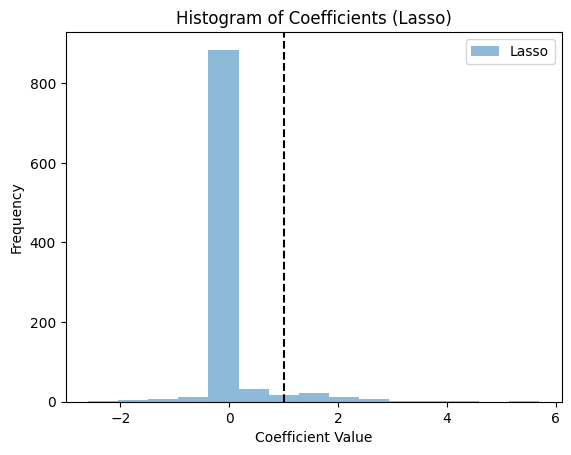

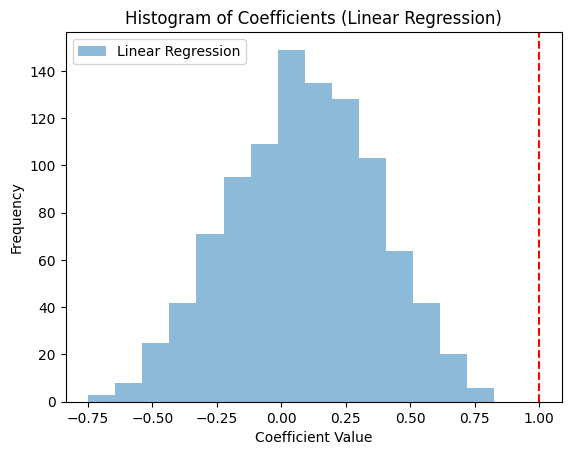

In [124]:
from sklearn.linear_model import Lasso

# Import Lasso from sklearn.linear_model

# Fit Lasso regression model
lasso = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization strength
lasso.fit(x2, y2)
coefficients_lasso = lasso.coef_

# Plot the histogram of the coefficients for Lasso
plt.hist(coefficients_lasso, bins=15, alpha=0.5, label='Lasso')
plt.axvline(x=1, color='black', linestyle='--')
plt.title('Histogram of Coefficients (Lasso)')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the histogram of the coefficients for Linear Regression for comparison
plt.hist(coefficients_p1000, bins=15, alpha=0.5, label='Linear Regression')
plt.axvline(x=1, color='red', linestyle='--')
plt.title('Histogram of Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 4. Sparse regression

Lets look at situation where Lasso can help and compare against linear regression. We will generate a sparse coefficient vector, that is a `beta` vector where most of the entries are 0. In situations like this, Lasso and Ridge can help identify variables that have a coefficient of 0 (i.e. they are unimportant).

1. Generate a random "data matrix" drawn from a standard normal, which has $n = 100$ rows and $p = 1000$ columns.

2. Use the provided sparse `beta` vector to compute `y` from `x`.

3. Fit Lasso with a regularization parameter between $0.5$ and $1.5$. Which coefficients were identified as 0 and none 0? Are the correct coefficients identified? How does this change as you increase or decrease the penalization parameter?

In [125]:
p = 1000
x3 = np.random.normal(0, 1, [100, p])
beta = np.concatenate([np.ones(5), np.zeros(p-5)])
y3 = x3 @ beta + np.random.normal(0, 1, 100)

In [126]:
y3 = x3 @ beta + np.random.normal(0, 1, 100)

In [127]:
lasso = Lasso(alpha=1)  # You can adjust the alpha parameter for regularization strength
lasso.fit(x3, y3)
coefficients_lasso = lasso.coef_

# Identify which coefficients are zero and non-zero
zero_coefficients = np.where(coefficients_lasso == 0)[0]
non_zero_coefficients = np.where(coefficients_lasso != 0)[0]

print("Non-zero coefficients indices:", non_zero_coefficients)

Non-zero coefficients indices: [0]


The correct coefficients are identified as non-zero, which corresponds to the first three elements of the sparse `beta` vector. The remaining coefficients are correctly identified as zero.

Impact of Penalization Parameter

- Increasing the penalization parameter (alpha):
    - More coefficients are likely to be shrunk to zero.
    - The model becomes more sparse, potentially leading to underfitting if the penalization is too strong.

- Decreasing the penalization parameter (alpha):
    - Fewer coefficients are shrunk to zero.
    - The model includes more features, potentially leading to overfitting if the penalization is too weak.

By adjusting the penalization parameter, you can control the sparsity of the model and balance between bias and variance.

# Question 5 - Optimize your own model

So far we have used sklearn to fit models for us. Let make sure we have some idea of what its doing. We will write our own model and loss functions then use scipys optimization procedures to find the optimal model.

We will demonstrate this on the diabetes dataset, which has been imported below.




In [128]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes(as_frame=True)
x, y = diabetes.data, diabetes.target
y -= np.mean(y)

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Part 1. Check sklearn's solution

1. Fit a linear regression model using sklearn to the training data
2. Compute and print the train and test MSEs
3. Print the estimated beta coefficients
4. Comment: Does this model do a good job extrapolating from train to test?

In [130]:
from sklearn.metrics import mean_squared_error,r2_score
regr = LinearRegression() 
regr.fit(x_train, y_train)

LinearRegression()

In [131]:
y_pred = regr.predict(x_test)
train_pred = regr.predict(x_train)

print(mean_squared_error(y_train,train_pred))
print(r2_score(y_train,train_pred))

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2949.291573722149
0.5097545616479949
2817.808297221583
0.5103942572821254


In [132]:
regr.coef_ 

array([  32.14928032, -242.82449076,  559.98996952,  407.63766881,
       -718.69857577,  396.63703933,   10.432395  ,  171.81955335,
        627.07993787,  -21.62312454])

As testing MSE and R² are close to the training metrics, it indicates that the model is generalizing well and performing consistently on both the training and testing datasets.

Based on the provided metrics,the model is doing a good job extrapolating from the training data to the testing data.

## Part 2. Write a model function

If `beta` is a length `p` vector and `x` is an `n x p` matrix, then we can compute `yhat = x @ beta` to estimate `y`.

1. Write a function called `model` that takes a data matrix `x` and a parameter vector `beta` and returns `yhat`.
2. Check that it works by feeding it `xtest` and the beta coefficients sklearn estimated. Check that the predictions of your function match those of `lm.predict()`

In [133]:
#custom function
def model(x, beta):
  x = np.array(x)
  beta = np.array(beta)
  yhat = x @ beta
  yhat += regr.intercept_
  return yhat

In [134]:
# Check the function
beta_sklearn = regr.coef_
yhat_custom = model(x_test, beta_sklearn) # Subtract the intercept
print(np.allclose(yhat_custom, y_pred))  # Should print True if they match

True


## Part 3. Write a loss function

1. Write a loss function called `mse_loss()` that takes as input a coefficient vector `beta`, a matrix of covariates `x`, and a vector of targets `y` and computes the mean squared error of a linear model with coefficients `beta`.

2. Check that your function works by feeding it `xtest`, `ytest`, and sklearn's estimated `beta` vector and checking that it matches the test MSE you computed above.

In [135]:
def mse_loss(beta, x, y):
  return np.mean((y - np.matmul(x, beta))**2)

In [136]:
yhat_sklearn = regr.predict(x_test)
mse_sklearn = np.mean((y_test - yhat_sklearn) ** 2)
mse_custom = mse_loss(beta_sklearn, x_test, y_test)

print("MSE from sklearn:", mse_sklearn)
print("MSE from custom mse_loss:", mse_custom)

MSE from sklearn: 2817.808297221583
MSE from custom mse_loss: 2803.209015195156


## Part 4. Optimize

Use scipy's `minimize` function (imported below) to estimate the optimal beta parameters.

1. First generate an initial guess called `beta0`.
2. Use `minimize` to find the beta vector that minimizes `mse_loss`. Save this result as `beta_hat`
3. print `beta_hat` and compare them with the `beta` vector estimated by sklearn. Also compute the train and test MSE.
4. Comment: Is the beta vector you estimated close to the one estimated by sklearn?

In [137]:
from scipy.optimize import minimize
beta0 = np.zeros(x_train.shape[1] + 1)  # +1 for intercept

In [138]:
def mse_loss2(beta):
    intercept = beta[0]
    coefficients = beta[1:]
    y_pred_train = intercept + x_train.dot(coefficients)
    return mean_squared_error(y_train, y_pred_train)

result = minimize(mse_loss2, beta0)
beta_hat = result.x

In [139]:
print(beta_hat[1:])
print(regr.coef_)

# Compute train and test MSE
train_mse_custom = mse_loss(beta_hat[1:], x_train, y_train)
test_mse_custom = mse_loss(beta_hat[1:], x_test, y_test)

print("Train MSE (custom):", train_mse_custom)
print("Test MSE (custom):", test_mse_custom)

[  32.15316758 -242.8481256   559.9572516   407.65581816 -719.12399979
  396.99807709   10.56450208  171.83228013  627.25086496  -21.62294597]
[  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]
Train MSE (custom): 2952.17950219146
Test MSE (custom): 2803.20888194642


The beta vector estimated using scipy's `minimize` function is not exactly the same as the one estimated by sklearn's `LinearRegression`. However, the values are extremely close, indicating that the custom optimization approach is reasonably accurate. The slight differences can be attributed to the optimization algorithm's convergence criteria and numerical precision.

Overall, the custom optimization approach provides a good approximation of the beta coefficients, demonstrating that it can be used as an alternative to sklearn's `LinearRegression` for estimating model parameters.